<a href="https://colab.research.google.com/github/MinhAnh99/Python_RFM_Analysis/blob/main/MinhAnh_RFM_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Import Libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
!pip install squarify
import squarify
import plotly.express as px

In [4]:
# Loading dataset
Orders_RFM = pd.read_excel('Dataset.xlsx')

In [5]:
Orders_RFM.describe()

,Row ID,Postal Code,Sales,Quantity,Unit Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,53.120197
std,2885.163629,32063.693350,623.245101,2.225110,122.251398
min,1.000000,1040.000000,0.444000,1.000000,0.544500
25%,2499.250000,23223.000000,17.280000,2.000000,3.473600
50%,4997.500000,56430.500000,54.490000,3.000000,12.933600
75%,7495.750000,90008.000000,209.940000,5.000000,54.522000
max,9994.000000,99301.000000,22638.480000,14.000000,4074.926400


In [6]:
Orders_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [7]:
Orders_RFM = Orders_RFM[pd.notnull(Orders_RFM['Customer ID'])]
Orders_RFM.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251


In [8]:
filtered_Orders_RFM = Orders_RFM['Customer ID'].drop_duplicates()

In [9]:
Returned = pd.read_excel("Dataset.xlsx", sheet_name = "Return")
Returned.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [ ]:
#from datetime import date
#now = date.today()
#now


In [10]:
max_date = Orders_RFM['Order Date'].max()
max_date

Timestamp('2017-12-30 00:00:00')

In [11]:
# Calculate R,F,M valuable
RFM = Orders_RFM.groupby('Customer ID').agg({'Order Date':'max',
                                             'Order ID':'count',
                                             'Sales':'sum'}).reset_index()

RFM['Order Date'] = (pd.to_datetime('2017-12-31') - RFM['Order Date']).dt.days
RFM.columns = ['Customer ID','Recency','Frequency','Monetary']
print(RFM)

    Customer ID  Recency  Frequency  Monetary
0      AA-10315      185         11  5563.560
1      AA-10375       20         15  1056.390
2      AA-10480      260         12  1790.512
3      AA-10645       56         18  5086.935
4      AB-10015      416          6   886.156
..          ...      ...        ...       ...
788    XP-21865       44         28  2374.658
789    YC-21895        5          8  5454.350
790    YS-21880       10         12  6720.444
791    ZC-21910       55         31  8025.707
792    ZD-21925      203          9  1493.944

[793 rows x 4 columns]


In [16]:
# Calculate R,F,M score by qcut
lab_des=[5,4,3,2,1]
lab_asc=[1,2,3,4,5]
RFM['R'] = pd.qcut(RFM['Recency'], q=5, labels=lab_des)
RFM['F'] = pd.qcut(RFM['Frequency'], q=5, labels=lab_asc)
RFM['M'] = pd.qcut(RFM['Monetary'], q=5, labels=lab_asc)


In [18]:
# match 3 values ​​R, F, M to get RFM score
RFM['RFM_score'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)

In [24]:
# Split RFM Score in table segmentation into individual points
segmentation = pd.read_excel('Dataset.xlsx',sheet_name='Segmentation')
# Rename column
segmentation.columns = ['segment','RFM_score']
# Split RFM value string into lists
segmentation['RFM_score'] = segmentation['RFM_score'].str.split(',')
# Separate each individual point
segmentation = segmentation.explode('RFM_score')
# remove spaces before and after RFM_score
segmentation['RFM_score'] = segmentation['RFM_score'].str.strip()

In [45]:
# Merge rfm and seg to classify segments for each customer_id
customer_segmentation = RFM.merge(segmentation, on='RFM_score', how='left')

In [44]:
segmentation_data = customer_segmentation.groupby('segment').agg(customer_count=('Customer ID','count'),
                                          avg_recency = ('Recency','mean'),
                                          avg_frequency = ('Frequency','mean'),
                                          sum_monetory = ('Monetary','sum')).round(1).reset_index()


In [46]:
segmentation_data['customer_share'] = (segmentation_data['customer_count']*100/segmentation_data['customer_count'].sum()).round(2)
segmentation_data['monetary_share'] = (segmentation_data['sum_monetory']*100/segmentation_data['sum_monetory'].sum()).round(2)

segmentation_data.sort_values(by='customer_count',inplace=True)

In [91]:
# Set color palette
color1= sns.color_palette('cubehelix',16)
color2= sns.color_palette('Spectral',16)

In [92]:
# Build a treemap of customer segmentation
treemap_data = customer_segmentation.groupby('segment').agg(Segment_count=('segment', 'count')).reset_index()
fig = px.treemap(treemap_data, path=['segment'], values='Segment_count', title='Treemap of customer segmentation')
fig.show()

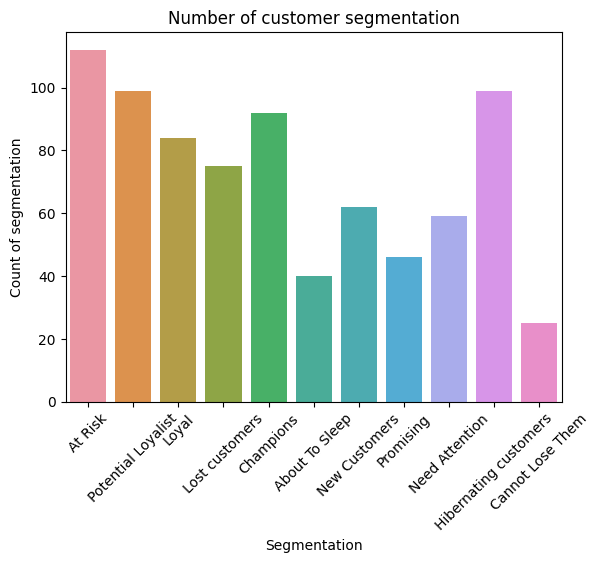

In [93]:
# Seaborn Countplot of customer segmentation
sns.countplot(x = customer_segmentation['segment'])
plt.title('Number of customer segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Count of segmentation')
plt.xticks(rotation=45)
plt.show()

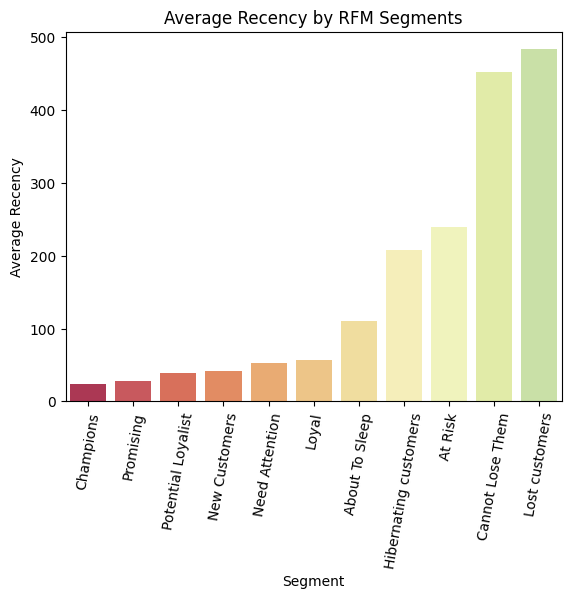

In [94]:
# bar chart Average Recency by RFM segments
r_chart = sns.barplot(x='segment',
            y='avg_recency',
            data = segmentation_data.sort_values('avg_recency'),
            palette=color2)
r_chart.set_title('Average Recency by RFM Segments')
r_chart.set(xlabel='Segment',
            ylabel='Average Recency')
plt.xticks(rotation=80)
plt.show()

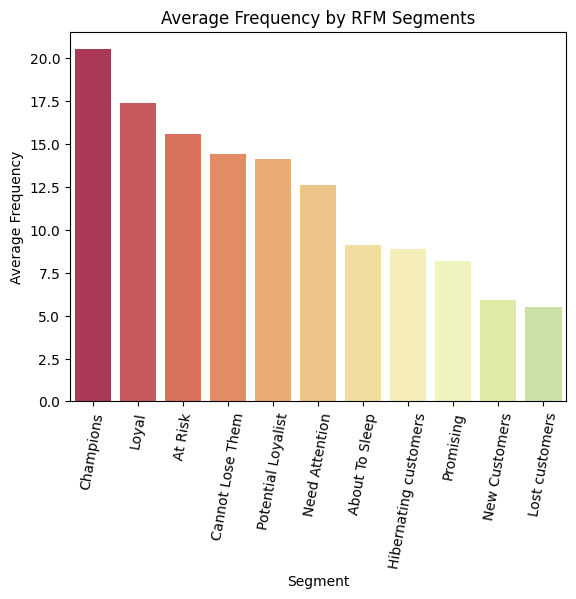

In [95]:
# bar chart Average Frequency by RFM segments
f_chart =sns.barplot(x='segment',
            y='avg_frequency',
            data= segmentation_data.sort_values('avg_frequency',ascending=False),
            palette=color2)
f_chart.set_title('Average Frequency by RFM Segments')
f_chart.set(xlabel='Segment',
            ylabel='Average Frequency')
plt.xticks(rotation=80)
plt.show()